In [5]:
# Python  3.10!
# algorytm knn - k nearest neighbours


# porównywanie odległości między punktami

                 # k najbliższych punków#
#               #metoda: sum odwrotności#
#                #metryka: city block#
Data = [
    ("A", 13, 20),
    ("A", 12, 19),
    ("A", 12, 21),
    ("A", 12, 20),
    ("A", 10, 18),
    ("B", 10, 21),
    ("B", -11, 4),
    ("B", 1, 23),
    ("B", 5, 18),
    ("B", -5, 10),
    ("B", 0, 15),
    ("B", 11.3, 13.2),
    ("C", 22, 29),
    ("C", 25, 21),
    ("C", 20, 30),
    ("C", 24, 20),
    ("C", 20, 32),
    ("D", 20, 19),
    ("D", 16, 23),
    ("D", 16, 24),
    ("D", 14, 29),
    ("D", 17, 29),
    ("D", 15, 28),
    ("D", 16, 27),
    ("D", 16, 22),
    ("D", 12, 22),
    ("D", 18, 32),
    ("D", 14, 23),
    ("D", 20, 17),
    ("D", 16, 18),
    ("D", 15, 21)
]

data_copy = Data.copy()
###Draw data on Matplotlib 

In [6]:
def split_data_in_classes(Data):
    split_data = {}
    for item in Data:
        class_label = item[0]  # Get the class label
        if class_label not in split_data:
            split_data[class_label] = []  # Initialize a list for this class
        split_data[class_label].append(item[1:])  # Append the item to the corresponding class list
    return split_data
split_data

NameError: name 'split_data' is not defined

In [7]:
from matplotlib import pyplot as plt 
import numpy as  np


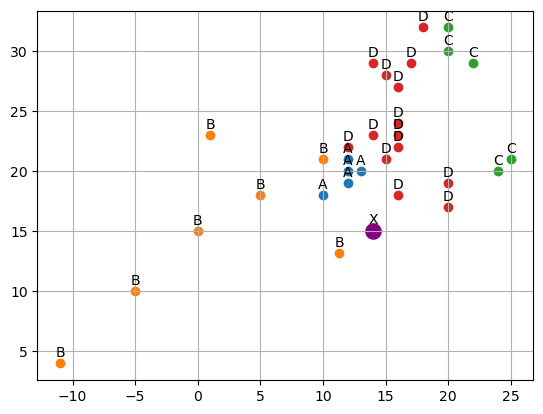

In [8]:
def  draw_points(data_with_classes):
    split_data = split_data_in_classes(data_with_classes)

    fig, ax = plt.subplots()

    for k, v in split_data.items():
        x, y = [], []
        for point in v:
            x.append(point[0])  # x-coordinates 
            y.append(point[1])  # y-coordinates 
        
        ax.scatter(x, y, label=k)  # Plot the points for this class
        for i in range(len(x)):
            ax.annotate(k, (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    # Additional scatter point
    plt.scatter(14, 15,s = [120], color="purple", label="Point (14, 15)")
    ax.annotate("X", (14,15), textcoords="offset points", xytext=(0,6), ha='center' )
    
    plt.grid()
    plt.show()
draw_points(Data)

In [9]:
#posortowanie po  zmiennej pierwszej czyli "A" "B" itd 
#Data.sort(key= lambda x : x[0])

In [10]:

from math import sqrt

#policzenie dystnasów między punktami  A a docelowym który checemy klasyfikować
def sumy_odwrotnosci(added_point, distance_data):
    if len(added_point)!= len(distance_data):
        raise  Exception(f"nieodpowiednie dystane dla punktów miedzy sobą {len(added_point)}, {len(distance_data)} ")
        # Metoda odległości city block  suma po |x1-x2|...
    suma = [(e1-e2)**2 for e1,e2 in zip(added_point,distance_data)]
    #return sum(suma)
    #pierwiastek z sumy odległości 
    return round(sqrt(sum(suma)),4)

assert(sumy_odwrotnosci((3,5),(6,7)))==3.6056

In [11]:
def sum_of_current_point(data,added_point):
    data
    print(added_point)
    for i in range(len(data)):
        point = data[i][0]
        distance_data = data[i][1:]
        data[i] = (point, sumy_odwrotnosci(added_point, distance_data))
    return data


In [12]:

Data =sum_of_current_point(Data,(14,15))
#Data.sort(key= lambda x : x[1])


(14, 15)


In [13]:
def classify_point_at_k_neightbours(Distances_to_klasses, k):
    Distances_to_klasses = sorted(Distances_to_klasses,key= lambda x : x[1])
    classes = {}
    distance = 0
    i =0
    # szukamy klasyfikatora  sumując odrwotności dystansów  
    while i<len(Distances_to_klasses) and i <=k:
        distance = Distances_to_klasses[i][1]
        if Distances_to_klasses[i][0] in classes.keys():
            classes[Distances_to_klasses[i][0]] += 1/(distance**2)
        elif Distances_to_klasses[i][0] not in classes.keys():
            classes[Distances_to_klasses[i][0]] =1/(distance**2)
        i+=1
    print(f" closest to object by {k} points  is :")
    max_val = max(classes.values())
    return {f"{key}:{round(value,4)}" for key,value in classes.items() if value==max_val }

   
   

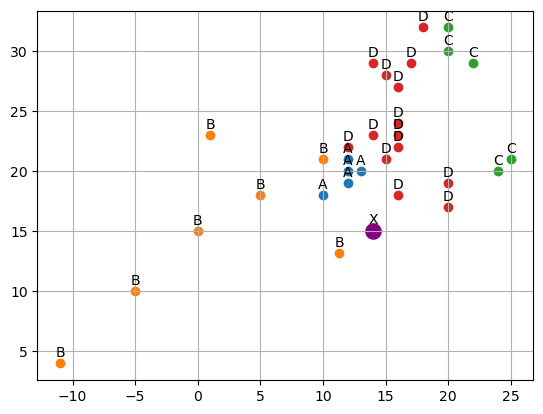

 closest to object by 15 points  is :
{'D:0.228'}
 closest to object by 11 points  is :
{'A:0.1879'}
 closest to object by 5 points  is :
{'A:0.1629'}
 closest to object by 3 points  is :
{'B:0.095'}


In [14]:
draw_points(data_copy)
print(classify_point_at_k_neightbours(Data,15))
print(classify_point_at_k_neightbours(Data,11))
print(classify_point_at_k_neightbours(Data,5))
print(classify_point_at_k_neightbours(Data,3))

In [15]:
DATA = """5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.2,Iris-setosa
5.0,3.2,1.2,0.2,Iris-setosa
5.5,3.5,1.3,0.2,Iris-setosa
4.9,3.6,1.4,0.1,Iris-setosa
4.4,3.0,1.3,0.2,Iris-setosa
5.1,3.4,1.5,0.2,Iris-setosa
5.0,3.5,1.3,0.3,Iris-setosa
4.5,2.3,1.3,0.3,Iris-setosa
4.4,3.2,1.3,0.2,Iris-setosa
5.0,3.5,1.6,0.6,Iris-setosa
5.1,3.8,1.9,0.4,Iris-setosa
4.8,3.0,1.4,0.3,Iris-setosa
5.1,3.8,1.6,0.2,Iris-setosa
4.6,3.2,1.4,0.2,Iris-setosa
5.3,3.7,1.5,0.2,Iris-setosa
5.0,3.3,1.4,0.2,Iris-setosa
7.0,3.2,4.7,1.4,Iris-versicolor
6.4,3.2,4.5,1.5,Iris-versicolor
6.9,3.1,4.9,1.5,Iris-versicolor
5.5,2.3,4.0,1.3,Iris-versicolor
6.5,2.8,4.6,1.5,Iris-versicolor
5.7,2.8,4.5,1.3,Iris-versicolor
6.3,3.3,4.7,1.6,Iris-versicolor
4.9,2.4,3.3,1.0,Iris-versicolor
6.6,2.9,4.6,1.3,Iris-versicolor
5.2,2.7,3.9,1.4,Iris-versicolor
5.0,2.0,3.5,1.0,Iris-versicolor
5.9,3.0,4.2,1.5,Iris-versicolor
6.0,2.2,4.0,1.0,Iris-versicolor
6.1,2.9,4.7,1.4,Iris-versicolor
5.6,2.9,3.6,1.3,Iris-versicolor
6.7,3.1,4.4,1.4,Iris-versicolor
5.6,3.0,4.5,1.5,Iris-versicolor
5.8,2.7,4.1,1.0,Iris-versicolor
6.2,2.2,4.5,1.5,Iris-versicolor
5.6,2.5,3.9,1.1,Iris-versicolor
5.9,3.2,4.8,1.8,Iris-versicolor
6.1,2.8,4.0,1.3,Iris-versicolor
6.3,2.5,4.9,1.5,Iris-versicolor
6.1,2.8,4.7,1.2,Iris-versicolor
6.4,2.9,4.3,1.3,Iris-versicolor
6.6,3.0,4.4,1.4,Iris-versicolor
6.8,2.8,4.8,1.4,Iris-versicolor
6.7,3.0,5.0,1.7,Iris-versicolor
6.0,2.9,4.5,1.5,Iris-versicolor
5.7,2.6,3.5,1.0,Iris-versicolor
5.5,2.4,3.8,1.1,Iris-versicolor
5.5,2.4,3.7,1.0,Iris-versicolor
5.8,2.7,3.9,1.2,Iris-versicolor
6.0,2.7,5.1,1.6,Iris-versicolor
5.4,3.0,4.5,1.5,Iris-versicolor
6.0,3.4,4.5,1.6,Iris-versicolor
6.7,3.1,4.7,1.5,Iris-versicolor
6.3,2.3,4.4,1.3,Iris-versicolor
5.6,3.0,4.1,1.3,Iris-versicolor
5.5,2.5,4.0,1.3,Iris-versicolor
5.5,2.6,4.4,1.2,Iris-versicolor
6.1,3.0,4.6,1.4,Iris-versicolor
5.8,2.6,4.0,1.2,Iris-versicolor
5.0,2.3,3.3,1.0,Iris-versicolor
5.6,2.7,4.2,1.3,Iris-versicolor
5.7,3.0,4.2,1.2,Iris-versicolor
5.7,2.9,4.2,1.3,Iris-versicolor
6.2,2.9,4.3,1.3,Iris-versicolor
5.1,2.5,3.0,1.1,Iris-versicolor
5.7,2.8,4.1,1.3,Iris-versicolor
6.3,3.3,6.0,2.5,Iris-virginica
5.8,2.7,5.1,1.9,Iris-virginica
7.1,3.0,5.9,2.1,Iris-virginica
6.3,2.9,5.6,1.8,Iris-virginica
6.5,3.0,5.8,2.2,Iris-virginica
7.6,3.0,6.6,2.1,Iris-virginica
4.9,2.5,4.5,1.7,Iris-virginica
7.3,2.9,6.3,1.8,Iris-virginica
6.7,2.5,5.8,1.8,Iris-virginica
7.2,3.6,6.1,2.5,Iris-virginica
6.5,3.2,5.1,2.0,Iris-virginica
6.4,2.7,5.3,1.9,Iris-virginica
6.8,3.0,5.5,2.1,Iris-virginica
5.7,2.5,5.0,2.0,Iris-virginica
5.8,2.8,5.1,2.4,Iris-virginica
6.4,3.2,5.3,2.3,Iris-virginica
6.5,3.0,5.5,1.8,Iris-virginica
7.7,3.8,6.7,2.2,Iris-virginica
7.7,2.6,6.9,2.3,Iris-virginica
6.0,2.2,5.0,1.5,Iris-virginica
6.9,3.2,5.7,2.3,Iris-virginica
5.6,2.8,4.9,2.0,Iris-virginica
7.7,2.8,6.7,2.0,Iris-virginica
6.3,2.7,4.9,1.8,Iris-virginica
6.7,3.3,5.7,2.1,Iris-virginica
7.2,3.2,6.0,1.8,Iris-virginica
6.2,2.8,4.8,1.8,Iris-virginica
6.1,3.0,4.9,1.8,Iris-virginica
6.4,2.8,5.6,2.1,Iris-virginica
7.2,3.0,5.8,1.6,Iris-virginica
7.4,2.8,6.1,1.9,Iris-virginica
7.9,3.8,6.4,2.0,Iris-virginica
6.4,2.8,5.6,2.2,Iris-virginica
6.3,2.8,5.1,1.5,Iris-virginica
6.1,2.6,5.6,1.4,Iris-virginica
7.7,3.0,6.1,2.3,Iris-virginica
6.3,3.4,5.6,2.4,Iris-virginica
6.4,3.1,5.5,1.8,Iris-virginica
6.0,3.0,4.8,1.8,Iris-virginica
6.9,3.1,5.4,2.1,Iris-virginica
6.7,3.1,5.6,2.4,Iris-virginica
6.9,3.1,5.1,2.3,Iris-virginica
5.8,2.7,5.1,1.9,Iris-virginica
6.8,3.2,5.9,2.3,Iris-virginica
6.7,3.3,5.7,2.5,Iris-virginica
6.7,3.0,5.2,2.3,Iris-virginica
6.3,2.5,5.0,1.9,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica
6.2,3.4,5.4,2.3,Iris-virginica
5.9,3.0,5.1,1.8,Iris-virginica
"""

In [16]:
data = DATA.split("\n")
data_iris = []
for i in data:
    set_i =[]
    i = i.split(",")
    set_i.append(i[-1])
    for el in i[:-1]:
        set_i.append(float(el))
    data_iris.append(tuple(set_i))
data_iris= data_iris[:-2]
data_iris_base = data_iris.copy()

In [17]:
Data =sum_of_current_point(data_iris_base,(6.0, 3.0, 5.2, 2.1))
print(classify_point_at_k_neightbours(Data,7))
Data =sum_of_current_point(data_iris_base,(6.0, 3.0, 5.2, 2.1))
print(classify_point_at_k_neightbours(Data,7))

(6.0, 3.0, 5.2, 2.1)
 closest to object by 7 points  is :
{'Iris-virginica:37.3437'}
(6.0, 3.0, 5.2, 2.1)


Exception: nieodpowiednie dystane dla punktów miedzy sobą 4, 1 

In [18]:
Data =sum_of_current_point(data_iris,(1.7,2.0,2.3,2.1))
print(classify_point_at_k_neightbours(Data,15))

(1.7, 2.0, 2.3, 2.1)
 closest to object by 15 points  is :
{'Iris-setosa:0.8723'}


In [202]:
import pandas as pd
import numpy as np

In [203]:
dataset = pd.read_csv('iris.csv')

In [204]:
print(dataset.head)
list(dataset.columns)

<bound method NDFrame.head of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>


['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [205]:
x = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [206]:
print(y.shape)
y[::3]

(150,)


array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Virginica'], dtype=object)

In [207]:
from sklearn.preprocessing import LabelEncoder

In [208]:
le= LabelEncoder()

In [209]:
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [210]:
import matplotlib.pyplot as plt 
import seaborn as  sns
%matplotlib inline

In [211]:
from sklearn.model_selection import train_test_split

In [230]:
X_train,X_test,Y_train,Y_test =  train_test_split(x,y,test_size = 0.2, random_state= 0)

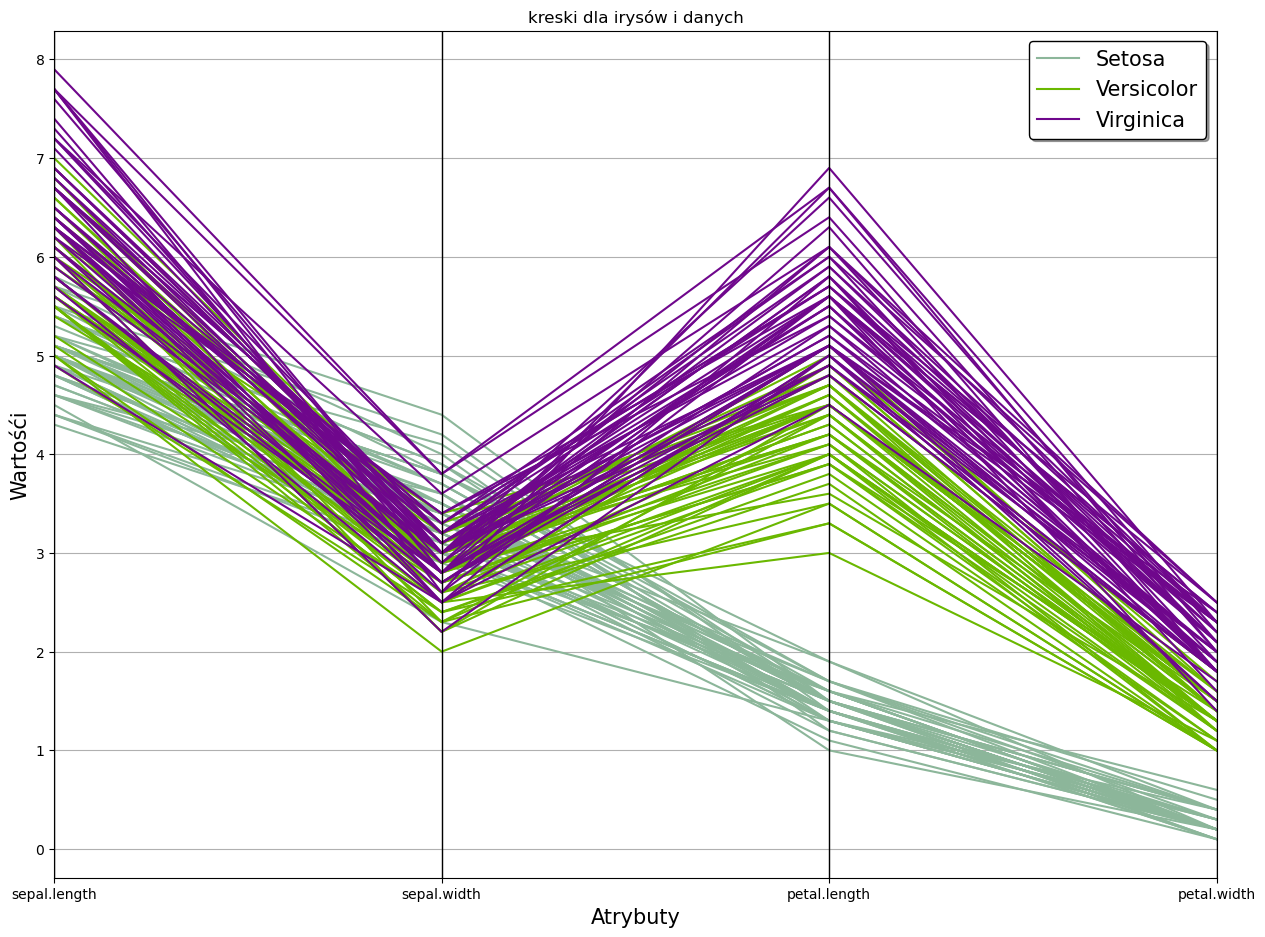

In [213]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,11))
parallel_coordinates(dataset,"variety")
plt.title("kreski dla irysów i danych")
plt.xlabel("Atrybuty",fontsize=15)
plt.ylabel("Wartośći",fontsize=15)
plt.legend(loc=1,prop={"size":15},frameon=True,shadow=True,facecolor="white",edgecolor="black")
plt.show()

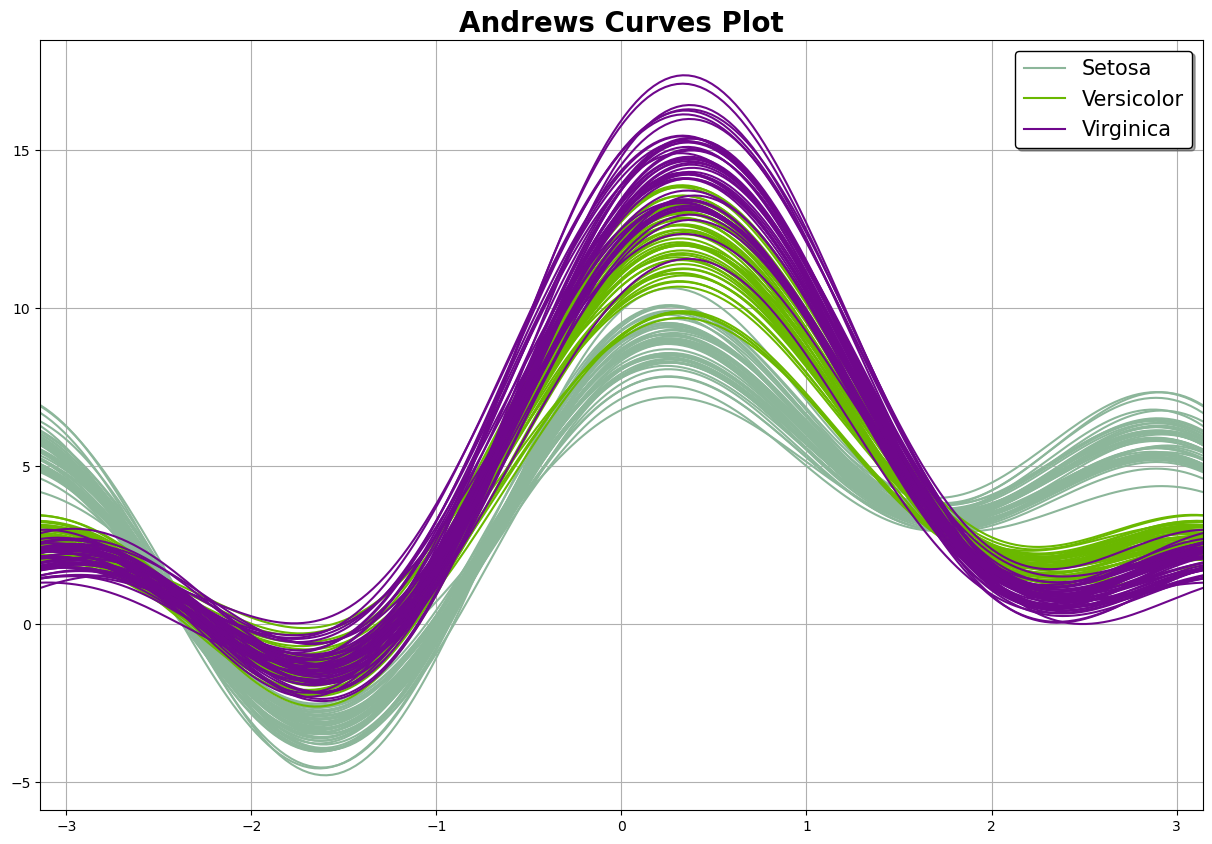

In [214]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset, "variety")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()


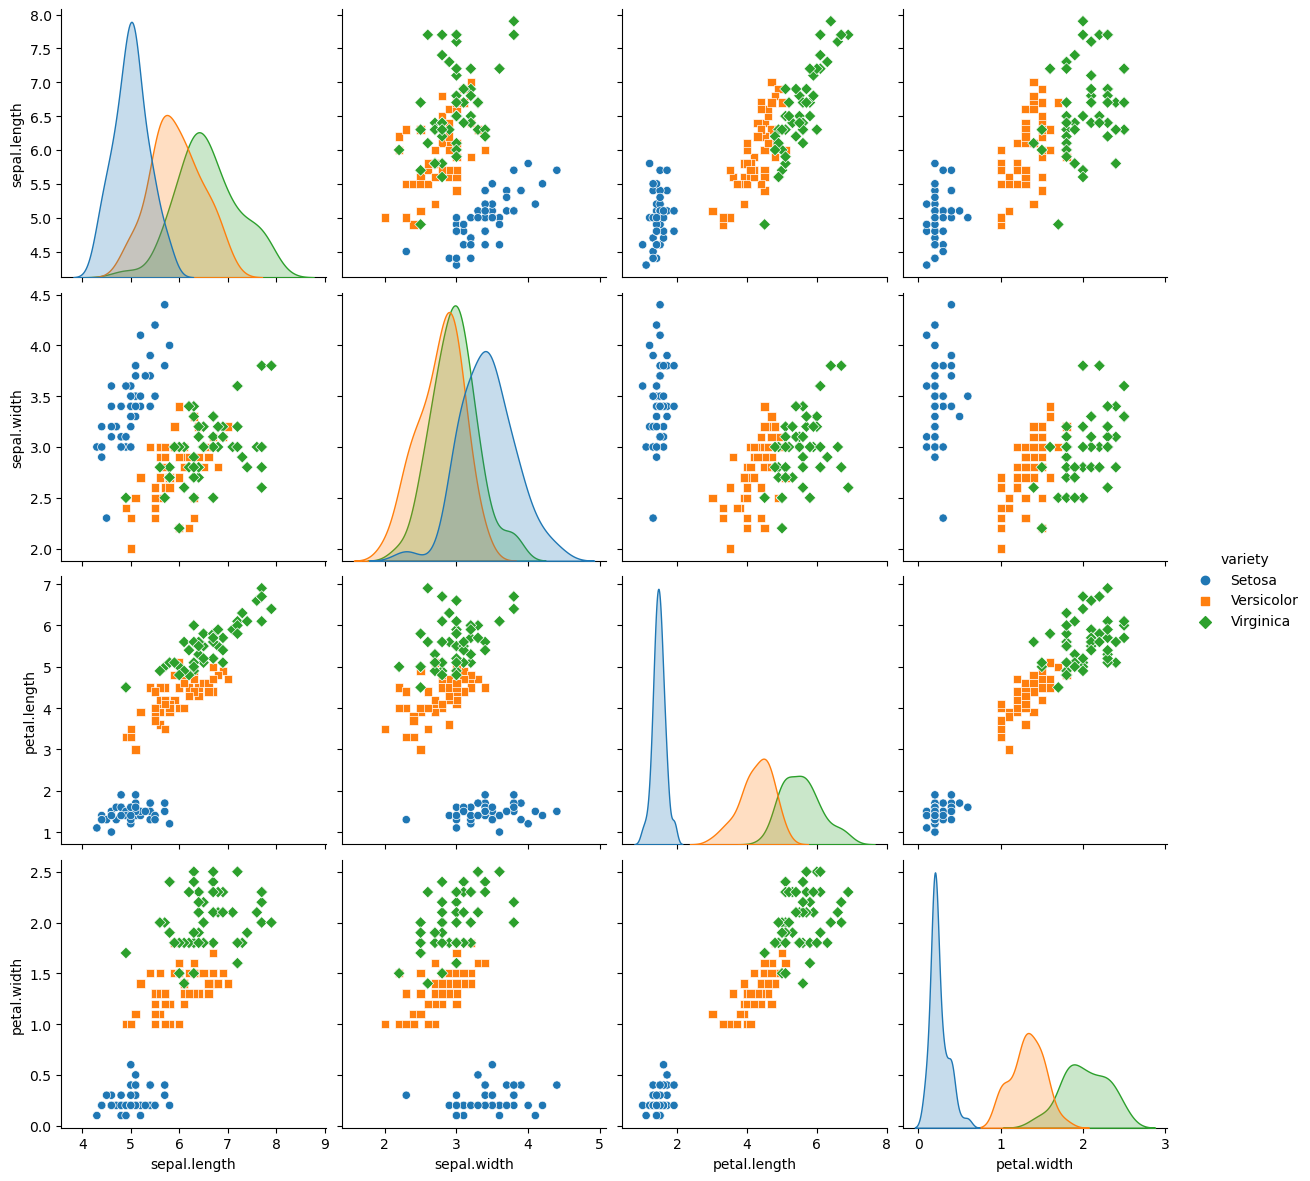

In [215]:
sns.pairplot(data=dataset, hue="variety", height=3, markers=["o", "s", "D"])

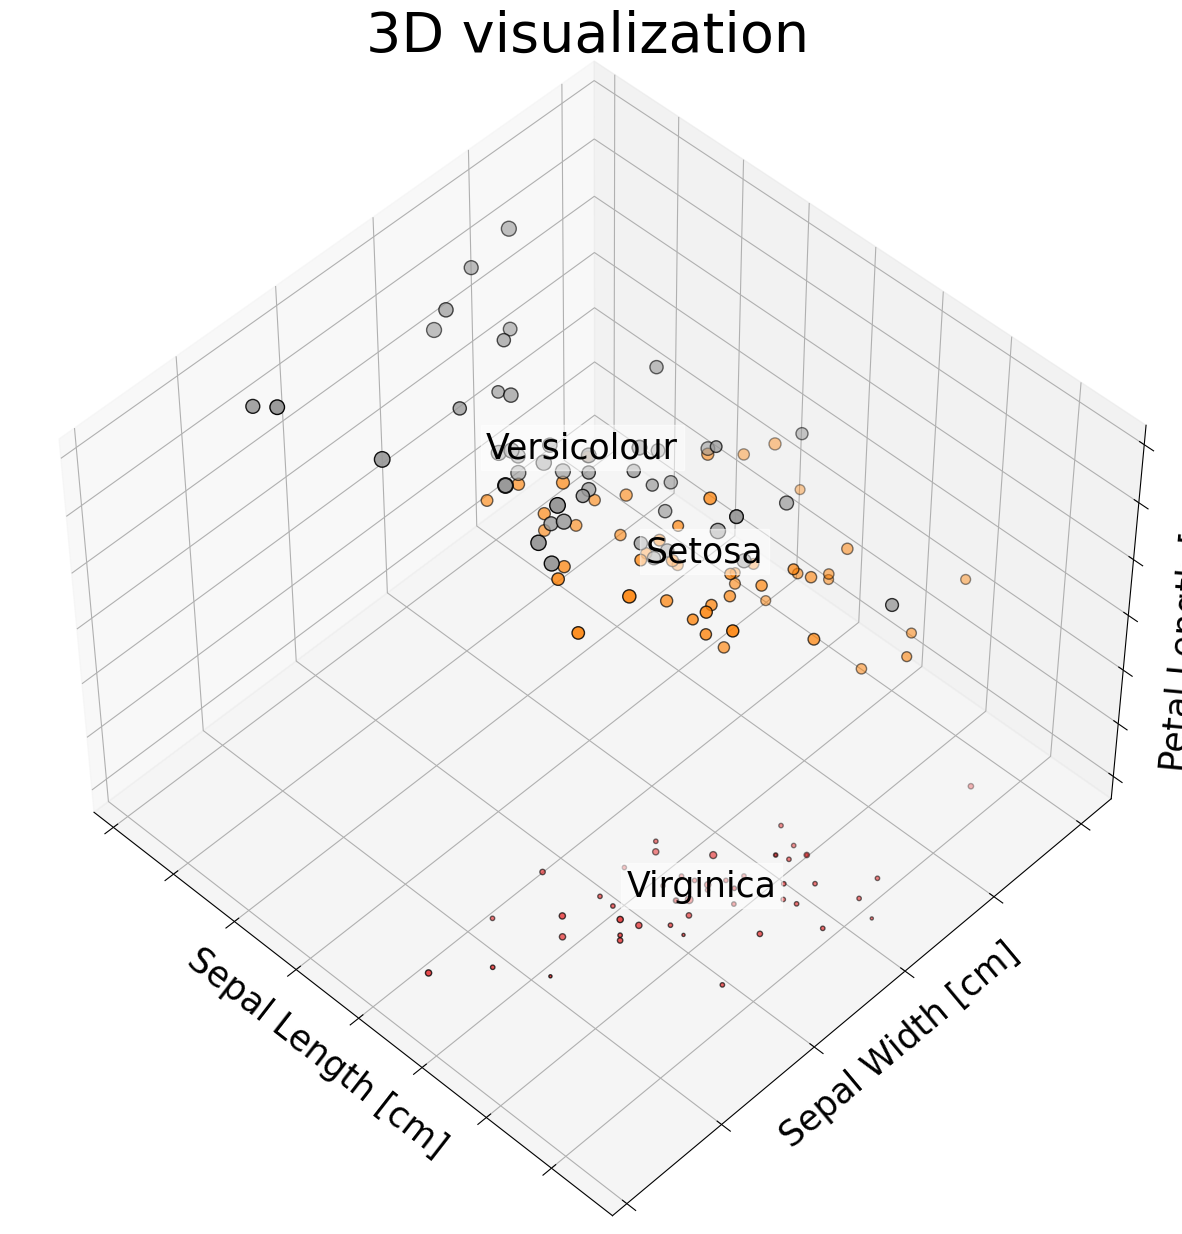

In [216]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=x[:, 3]*50)


for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(x[y == label, 0].mean(),
              x[y == label, 1].mean(),
              x[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'), size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.zaxis.set_ticklabels([])
plt.show()

In [317]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score
k =3
classifier= KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [318]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [319]:
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [320]:
data_point = np.array([[1.7, 2.0, 2.3, 2.1]])  # Reshape for a single sample
prediction = classifier.predict(data_point)
prediction
class_names = dataset.variety  # Get the target names
predicted_class = class_names[prediction[0]]  # Get the predicted class name

print(f"Predicted class for data point {data_point[0]}: {predicted_class}")

Predicted class for data point [1.7 2.  2.3 2.1]: Setosa


In [265]:
# best option for k is 9
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
predicted_class = class_names[prediction[0]]  # Get the predicted class name

print(f"Predicted class for data point {data_point[0]}: {predicted_class}")

Predicted class for data point [1.7 2.  2.3 2.1]: Setosa


In [266]:
cm = confusion_matrix(Y_test,Y_pred)
cm


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

ValueError: x and y must have same first dimension, but have shapes (60,) and (20,)

<Figure size 640x480 with 0 Axes>

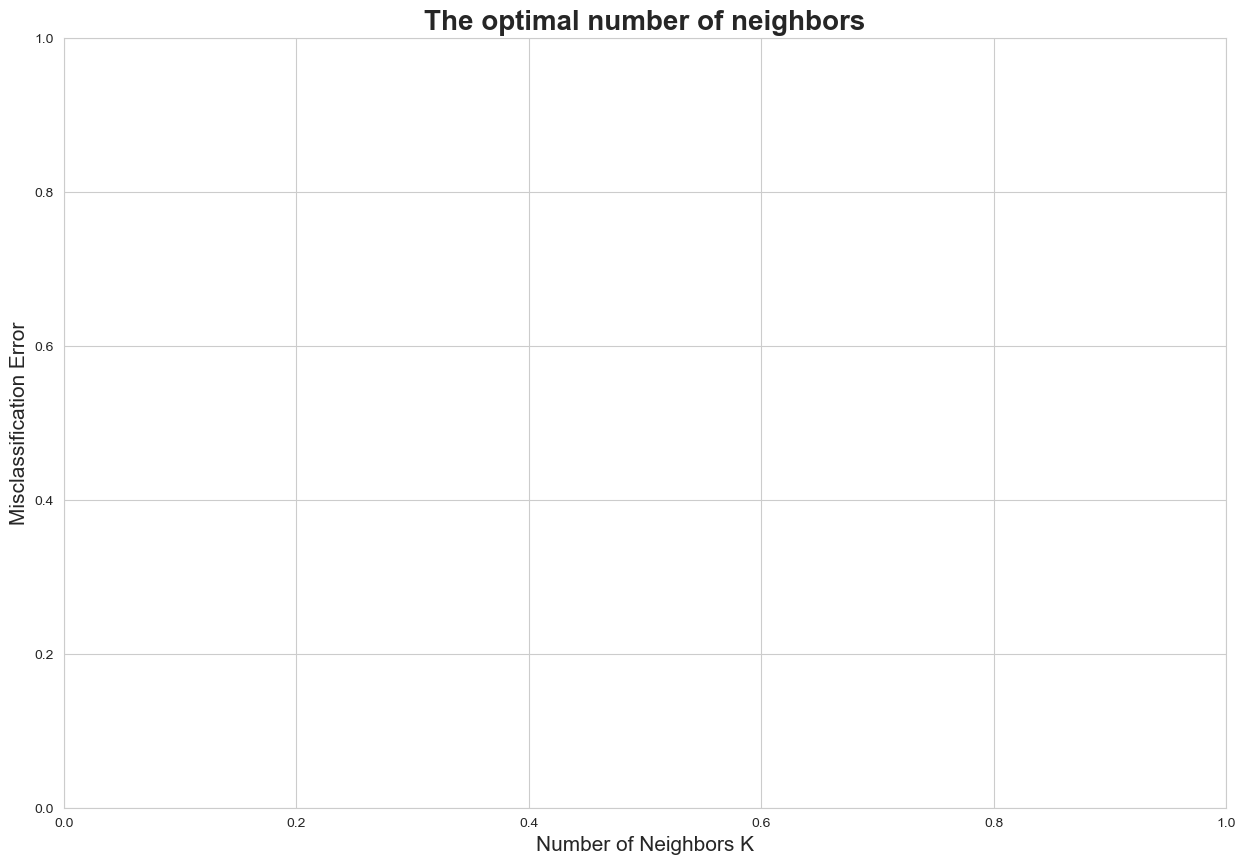

In [293]:
# creating list of K for KNN

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy') 
    cv_scores.append(scores.mean())
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot([x for x in range(1,40,2)], MSE)

plt.show()

In [316]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score
 
for i in range(25,80):
    classifier= KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test)
    cm = confusion_matrix(Y_test,Y_pred)
    accuracy = accuracy_score(Y_test,Y_pred)*100
    print(accuracy)

100.0
96.66666666666667
93.33333333333333
96.66666666666667
96.66666666666667
96.66666666666667
93.33333333333333
90.0
93.33333333333333
96.66666666666667
93.33333333333333
93.33333333333333
93.33333333333333
93.33333333333333
93.33333333333333
93.33333333333333
93.33333333333333
93.33333333333333
93.33333333333333
93.33333333333333
93.33333333333333
90.0
90.0
86.66666666666667
90.0
86.66666666666667
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
93.33333333333333
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
80.0
80.0
80.0
83.33333333333334
83.33333333333334
83.33333333333334
70.0
66.66666666666666
66.66666666666666
63.33333333333333
60.0
